In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/encontros.csv')
df = pd.DataFrame(data)
print(data)

      tipo_dia tipo_encontro   meteo   tv encontro
0       semana        jantar  quente  mau      sim
1       semana        jantar    frio  bom      nao
2       semana        jantar  quente  bom      sim
3       semana        jantar    frio  mau      nao
4       semana        jantar  quente  bom      sim
5       semana         disco  quente  bom      nao
6       semana         disco  quente  mau      nao
7       semana         disco    frio  bom      nao
8       semana         disco    frio  mau      nao
9   fim_semana         disco  quente  mau      sim
10  fim_semana         disco  quente  bom      sim
11  fim_semana         disco    frio  mau      sim
12  fim_semana         disco    frio  bom      sim
13  fim_semana        jantar  quente  mau      sim
14  fim_semana        jantar  quente  bom      nao
15  fim_semana        jantar    frio  mau      nao
16  fim_semana        jantar    frio  bom      nao


In [5]:
# Converter as variáveis categóricas em numéricas usando LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [6]:
# Separar as features e o alvo (target)
X = df.drop(columns=['encontro'])
y = df['encontro']


In [7]:
# Treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

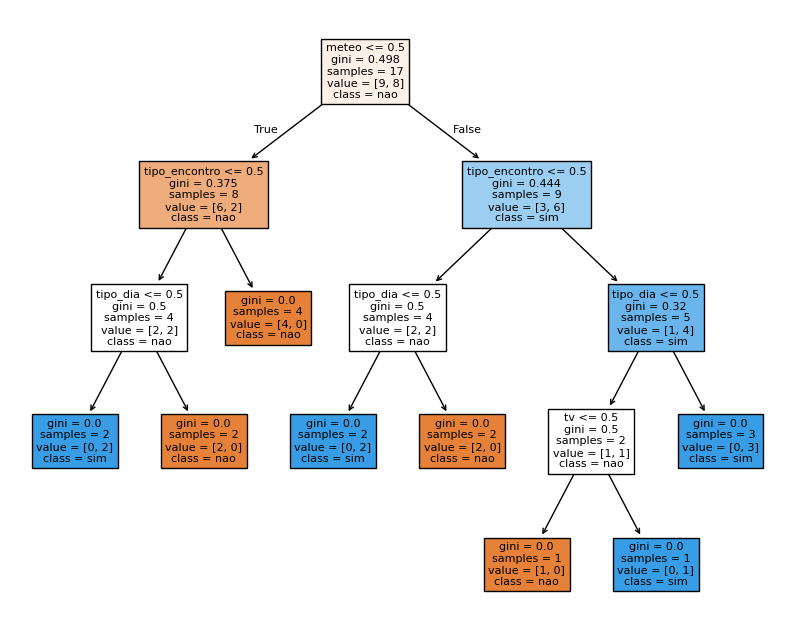

In [8]:
# Visualizar a árvore de decisão
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=['nao', 'sim'], filled=True)
plt.show()

Comentário sobre a Afirmação:
“Utilizando esta abordagem, não é possível avaliar a capacidade de generalização do modelo treinado.”

Esta afirmação é correta por várias razões:

Ausência de Divisão em Conjuntos de Treino e Teste: No exemplo acima, treinamos o modelo com a totalidade dos dados. Sem separar os dados em conjuntos de treino e teste (ou usar validação cruzada), o modelo pode simplesmente memorizar os dados de treino, o que leva a overfitting (sobreajuste). Esse comportamento impede que se possa avaliar como o modelo se comportaria em novos dados (que nunca viu), ou seja, não podemos determinar a capacidade de generalização.

Avaliação da Generalização: Para avaliar corretamente a capacidade de generalização de um modelo de machine learning, é necessário treinar o modelo num subconjunto dos dados (conjunto de treino) e testá-lo num conjunto de dados nunca antes vistos (conjunto de teste). Outra abordagem comum é a validação cruzada.

Risco de Overfitting: Quando usamos todos os dados para treinar, o modelo pode ficar muito ajustado aos padrões específicos dos dados de treino, sem capturar padrões que generalizem para novos dados. Isso é problemático quando queremos aplicar o modelo a novas instâncias.

Como Melhorar a Avaliação:

In [9]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de árvore de decisão no conjunto de treino
clf.fit(X_train, y_train)

# Avaliar a performance no conjunto de teste
accuracy = clf.score(X_test, y_test)
print(f"Accuracy no conjunto de teste: {accuracy}")


Accuracy no conjunto de teste: 0.5


Neste caso, o modelo é treinado num subconjunto dos dados e testado noutro, o que permite medir a sua capacidade de generalização e evita overfitting.

Conclusão:
Treinar uma árvore de decisão utilizando a totalidade dos dados impede-nos de avaliar a capacidade de generalização do modelo, pois não temos como verificar como ele se comportaria em dados que nunca viu. Para obter uma avaliação adequada, deve-se usar uma abordagem com treino e teste separados ou validação cruzada.